In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns

In [3]:
sns.set_context('paper', font_scale=2.2)
sns.set_style('ticks')

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import LB_D2Q9.porous_media.single_component as sc

In [6]:
sim = sc.Simulation_Runner(N=250, time_prefactor=1., num_populations=2)

u_lb: 0.004
nx: 250
ny: 250
2d global: (256, 256)
2d local: (32, 32)
The platforms detected are:
---------------------------
NVIDIA CUDA NVIDIA Corporation version: OpenCL 1.2 CUDA 9.0.194
The devices detected on platform NVIDIA CUDA are:
---------------------------
GeForce GTX TITAN Black [Type: GPU ]
Maximum clock Frequency: 980 MHz
Maximum allocable memory size: 1594 MB
Maximum work group size 1024
Maximum work item dimensions 3
Maximum work item size [1024L, 1024L, 64L]
---------------------------
This context is associated with  1 devices


In [7]:
sim.delta_t/sim.delta_x**2

1.000000016167174

In [8]:
sim.cs

0.57735026

In [9]:
import skimage as ski
import skimage.draw

In [10]:
u1 = np.zeros((sim.nx, sim.ny))
v1 = np.zeros((sim.nx, sim.ny))

circ_r, circ_c = ski.draw.circle(sim.nx/2, sim.ny/2, 20)
#u1[circ_r, circ_c] = 0

rho1 = np.zeros((sim.nx, sim.ny))
rho1[circ_r, circ_c] = 1.0

Gx_arr = 0.*np.ones_like(u1)
Gy_arr = 0.*np.ones_like(u1)

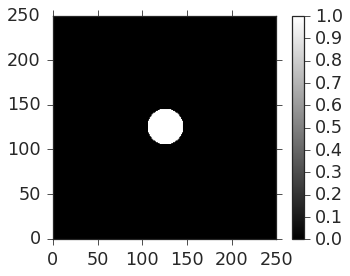

In [12]:
plt.imshow(rho1.T, origin = 'lower', cmap=plt.cm.binary_r)
plt.colorbar()

In [13]:
media1 = sc.Pourous_Media(sim, 0, nu_e = 1./6., epsilon=1., nu_fluid=0.0, K=1.0, Fe=0.0)
media1.initialize(u1, v1, rho1, Gx_arr=Gx_arr, Gy_arr=Gy_arr, f_amp=1e-5)

omega 1.0


In [14]:
u2 = np.zeros((sim.nx, sim.ny))
v2 = np.zeros((sim.nx, sim.ny))

circ_r, circ_c = ski.draw.circle(sim.nx/2, sim.ny/2, 20)

rho2 = np.ones((sim.nx, sim.ny))
rho2[circ_r, circ_c] = 0.0

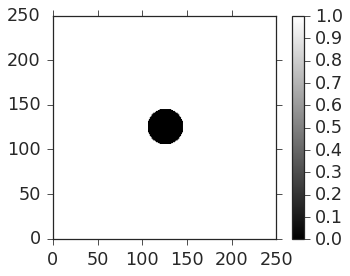

In [15]:
plt.imshow(rho2.T, origin = 'lower', cmap=plt.cm.binary_r)
plt.colorbar()

In [16]:
sim.u.get().shape

(250, 250, 2)

In [17]:
media2 = sc.Pourous_Media(sim, 1, nu_e = 1./6., epsilon=1., nu_fluid=10.0, K=1.0, Fe=0.0)
media2.initialize(u2, v2, rho2, f_amp=1e-5)

omega 1.0


In [18]:
sim.add_fluid(media1)
sim.add_fluid(media2)

In [19]:
sim.complete_setup()

In [20]:
sim.fluid_list

In [21]:
import LB_D2Q9.field_visualizer as fv

In [22]:
visualizer = fv.Field_Visualizer_Canvas(sim, sim.rho[:, :, 1], num_steps_per_draw=1, max_magnitude=1.2)

In [23]:
import time

In [24]:
tstart = time.time()
visualizer.show()
visualizer.measure_fps()
visualizer.app.run(allow_interactive=False)
tfinish = time.time()

print 'Time Elapsed:', tfinish - tstart
print 'Time points run:', visualizer.total_num_steps

0.7 FPS
26.7 FPS
30.3 FPS
30.5 FPS
30.8 FPS
30.6 FPS
30.5 FPS
30.7 FPS
30.4 FPS
30.7 FPS
30.7 FPS
30.2 FPS
29.9 FPS
29.9 FPS
28.3 FPS
28.1 FPS
29.8 FPS
31.0 FPS
31.0 FPS
31.0 FPS
31.1 FPS
30.9 FPS
31.1 FPS
31.1 FPS
31.1 FPS
30.7 FPS
Time Elapsed: 25.8570289612
Time points run: 783


# Other stuff

In [21]:
media1.update_hydro()

In [22]:
media2.update_hydro()

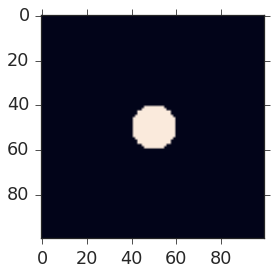

In [23]:
plt.imshow(sim.u.get()[:, :, 1])

In [24]:
plt.imshow(sim._prime.get()[:, :])
plt.colorbar()

AttributeError: 'Simulation_Runner' object has no attribute '_prime'

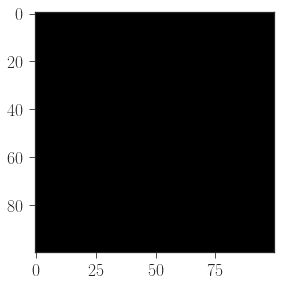

In [86]:
plt.imshow(sim.rho.get()[:, :, 1], cmap=plt.cm.binary_r)

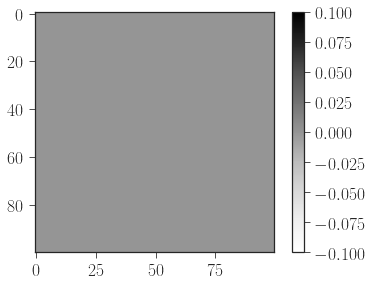

In [87]:
plt.imshow(sim.f.get()[:, :, 1, 5])
plt.colorbar()

In [83]:
sim.run(1)

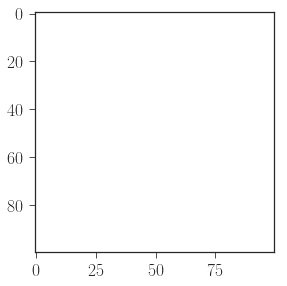

In [59]:
plt.imshow(sim.rho.get()[:, :, 1])

Let us attempt to create pipe flow now...we have to do that check unfortuantely. We'll impose a constant velocity at the inlet and outlet. For each phase. I don't see a way to avoid it...yeah. We're going to need pressure BC's eventually anyways...

# Tests

In [ ]:
feqtest = sim.feq.get()
print feqtest.shape

In [ ]:
plt.imshow(feqtest[:, :, 0, 1], cmap=plt.cm.binary_r)
plt.colorbar()

Hm. A couple of interesting problems...we need to initialize uprime and vprime, actually...*not* the u and v for each phase!

In [ ]:
ftest = sim.f.get()
print ftest.shape

In [ ]:
plt.imshow(ftest[:, :, 0, 5], cmap=plt.cm.binary_r)
plt.colorbar()

This looks right. Good.